# K-Nearest Neighbors

---

## Importation des données

In [196]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

In [197]:
iris = load_iris()
X = iris.data
y = iris.target

In [198]:
X = X[:,0:3:2]
data = np.c_[X,y]

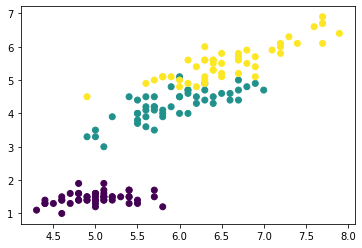

In [199]:
plt.scatter(data[:,0], data[:,1], c=data[:,-1]);

## KNN : Sklearn

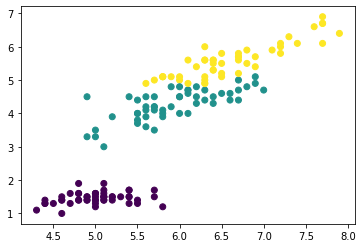

In [257]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X,y)
predict = knn.predict(X)

plt.scatter(data[:,0], data[:,1], c=predict);

## KNN : Implémentation

In [227]:
def KNN(X,y, n_neighbors=3):
    """
    Algorithme de clustering : K-nearest neighbors
    """
    
    X_ = np.c_[X,y]
    predict_label = np.zeros(X_.shape[0])

    for number, line in enumerate(X_):
        new_array = np.delete(X_, number, axis=0)
        dist = np.zeros((new_array.shape[0],2))
        
        for n_line, element in enumerate(new_array):
            dist[n_line,0] = np.linalg.norm(line[:-1] - element[:-1])
            dist[n_line,1] = element[-1]
        
        dist = dist[dist[:,0].argsort()][:n_neighbors]
        
        if (n_neighbours % 2 != 0):
            predict_label[number] = mode(dist[:,1]).mode
        else :
            predict_label[number] = mode(dist[:,1]).mode
    
    return predict_label

In [255]:
predict_lab = KNN(X,y, n_neighbors=3)

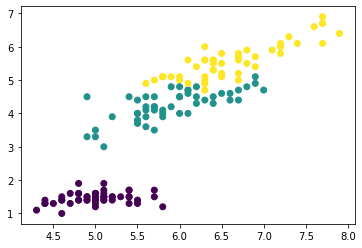

In [229]:
plt.scatter(data[:,0], data[:,1], c=predict_lab);

In [262]:
sum(predict_lab == predict) / len(predict_lab)

0.9866666666666667

Il y a une différence de deux observations comparé à Sklearn

### Nouvelles observations

In [247]:
new = np.array([5.5,5])

In [248]:
def predict(X,y,new, n_neighbours=3):
    """
    Predict single observation
    """
    X_ = np.c_[X,y]
    dist = np.zeros((X_.shape[0],2))

    for n_line, element in enumerate(X_):
        dist[n_line,0] = np.linalg.norm(element[:-1] - new)
        dist[n_line,1] = element[-1]

    dist = dist[dist[:,0].argsort()][:n_neighbours]
    predict_label = mode(dist[:,-1]).mode
    line = np.hstack([new,predict_label])
    
    return np.array([line])

In [249]:
predict_label = predict(X,y,new, n_neighbours=3)

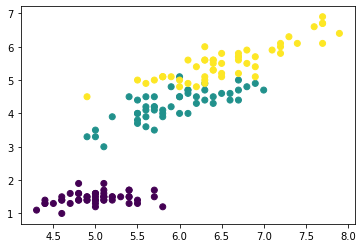

In [250]:
X_ = np.c_[X,y]
X_ = np.concatenate([X_,predict_label])
plt.scatter(X_[:,0], X_[:,1], c=X_[:,-1]);

### Comparaison du résultat avec Sklearn

In [251]:
predict_label[:,-1]

array([2.])

In [252]:
knn.predict(new.reshape(1,-1))

array([2])